In [1]:
import numpy as np # Manipulação de matrizes
import pandas as pd # Manipulação de dataframes
import matplotlib.pyplot as plt #Construção de gráficos
import seaborn as sns #Apoio ao matplotlib para melhora de gráficos


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Métricas para avaliação de algoritmos
                                                                          # de classificação

from sklearn.preprocessing import StandardScaler # Função de Normalização de Dados

from sklearn.model_selection import train_test_split # Método para realização de particionamento da base (holdout)

In [2]:
# Carregar conjunto de dados

df = pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
media_insulin = df['Insulin'].mean()

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
print('Número de Linhas =',df.shape[0])
print('Número de Colunas =',df.shape[1])

Número de Linhas = 768
Número de Colunas = 9


In [8]:
#!pip install pandas-profiling

from pandas_profiling import ProfileReport, model

profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_widgets()

In [9]:
# from pandas_profiling import ProfileReport, model

# profile_model = ProfileReport(df, title='Pandas Profiling Report')
# profile_model.to_widgets()

In [10]:
df.head(10) # Avaliando primeiras colunas da tabela

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
# Limpeza de NAN


df = df.dropna(axis = 1) #Drop linhas ou colunas (dependendo do 'axis')
print("Tamanho do meu dataframe: ",df.shape)

Tamanho do meu dataframe:  (768, 9)


In [12]:
df['Insulin'] = df['Insulin'].replace(0, media_insulin)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.799479,33.6,0.627,50,1
1,1,85,66,29,79.799479,26.6,0.351,31,0
2,8,183,64,0,79.799479,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [13]:
list_features = list(df.columns.drop('Outcome'))

In [14]:
# Separar base em variáveis explicativas e variável resposta

X = df[list_features]

# X = df[['Pregnancies',
#  'Glucose',
#  'BloodPressure',
#  'SkinThickness',
#  'Insulin',
#  'BMI',
#  'DiabetesPedigreeFunction',
#  'Age']]

y = df['Outcome']

In [15]:
print("Quantidade de 1's =",df['Outcome'].sum())
print("Quantidade de 0's =",len(df['Outcome']) - df['Outcome'].sum())

Quantidade de 1's = 268
Quantidade de 0's = 500


In [16]:
# Separar bases em treino e teste

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
# Importando KNN para CLASSIFICAÇÃO

from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Criar um loop com diversos valores de K

neighbors = np.arange(1, 26)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [21]:
for i, k in enumerate(neighbors):
    
    # Instanciar meu knn
    
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    
    #Treinando o modelo
    knn.fit(X_train_norm, y_train)
    
    # Calcular a acurácia para treino e para teste
    
    
    train_accuracy[i] = f1_score(knn.predict(X_train_norm), y_train)
    
    test_accuracy[i] = f1_score(knn.predict(X_test_norm), y_test)

Text(0, 0.5, 'F1 Score do modelo')

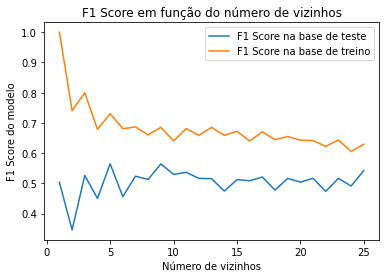

In [22]:
plt.title('F1 Score em função do número de vizinhos')

plt.plot(neighbors, test_accuracy, label='F1 Score na base de teste')

plt.plot(neighbors, train_accuracy, label='F1 Score na base de treino')

plt.legend()

plt.xlabel('Número de vizinhos')


plt.ylabel('F1 Score do modelo')

In [23]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [24]:
print('Acurácia do Modelo =', round(accuracy_score(knn.predict(X_test_norm), y_test),2))
print('F1 Score do Modelo =', round(f1_score(knn.predict(X_test_norm), y_test),2))
print('Precisão do Modelo =', round(precision_score(knn.predict(X_test_norm), y_test),2))

Acurácia do Modelo = 0.72
F1 Score do Modelo = 0.56
Precisão do Modelo = 0.51


# Árvore de Decisão

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
arvore_decisao = DecisionTreeClassifier()
arvore_decisao.fit(X_train, y_train)


print("Acurácia para base de treino: ", accuracy_score(y_train,arvore_decisao.predict(X_train)))
print("Acurácia do Modelo Teste:",accuracy_score(y_test,arvore_decisao.predict(X_test)))

Acurácia para base de treino:  1.0
Acurácia do Modelo Teste: 0.6770833333333334


### Por que a acurácia na base de treino deu tão Alta?

In [43]:
acuracia_arvore = []

profundidade_decision_tree = list(range(1,11))

for i in range(len(profundidade_decision_tree)):
    arvore_teste_profundidade = DecisionTreeClassifier(random_state=42, max_depth=profundidade_decision_tree[i])
    
    arvore_teste_profundidade.fit(X_train, y_train)
    
    print("Acurácia para base de treino com profundidade = ", profundidade_decision_tree[i], ":", accuracy_score(y_train,arvore_teste_profundidade.predict(X_train)))
    print("Acurácia para base de teste com profundidade = ", profundidade_decision_tree[i], ":", accuracy_score(y_test,arvore_teste_profundidade.predict(X_test)))

Acurácia para base de treino com profundidade =  1 : 0.7621527777777778
Acurácia para base de teste com profundidade =  1 : 0.7135416666666666
Acurácia para base de treino com profundidade =  2 : 0.7621527777777778
Acurácia para base de teste com profundidade =  2 : 0.7135416666666666
Acurácia para base de treino com profundidade =  3 : 0.7725694444444444
Acurácia para base de teste com profundidade =  3 : 0.7135416666666666
Acurácia para base de treino com profundidade =  4 : 0.8055555555555556
Acurácia para base de teste com profundidade =  4 : 0.6822916666666666
Acurácia para base de treino com profundidade =  5 : 0.84375
Acurácia para base de teste com profundidade =  5 : 0.7239583333333334
Acurácia para base de treino com profundidade =  6 : 0.8680555555555556
Acurácia para base de teste com profundidade =  6 : 0.7135416666666666
Acurácia para base de treino com profundidade =  7 : 0.9079861111111112
Acurácia para base de teste com profundidade =  7 : 0.7291666666666666
Acurácia p

In [41]:
#Inicializando uma Árvore de decisão

new_arvore_decisao = DecisionTreeClassifier(random_state=42, max_depth=3)
#Treinando Árvore

new_arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
print("Acurácia para base de treino: ", accuracy_score(y_train,new_arvore_decisao.predict(X_train)))
print("Acurácia do Modelo Teste:",accuracy_score(y_test,new_arvore_decisao.predict(X_test)))

Acurácia para base de treino:  0.7725694444444444
Acurácia do Modelo Teste: 0.7135416666666666


[Text(465.0, 990.9375, 'Glucose <= 143.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]\nclass = 1'),
 Text(232.5, 707.8125, 'Age <= 28.5\ngini = 0.36\nsamples = 454\nvalue = [347, 107]\nclass = 1'),
 Text(116.25, 424.6875, 'Glucose <= 127.5\ngini = 0.208\nsamples = 246\nvalue = [217, 29]\nclass = 1'),
 Text(58.125, 141.5625, 'gini = 0.134\nsamples = 208\nvalue = [193, 15]\nclass = 1'),
 Text(174.375, 141.5625, 'gini = 0.465\nsamples = 38\nvalue = [24, 14]\nclass = 1'),
 Text(348.75, 424.6875, 'BMI <= 26.95\ngini = 0.469\nsamples = 208\nvalue = [130, 78]\nclass = 1'),
 Text(290.625, 141.5625, 'gini = 0.127\nsamples = 44\nvalue = [41, 3]\nclass = 1'),
 Text(406.875, 141.5625, 'gini = 0.496\nsamples = 164\nvalue = [89, 75]\nclass = 1'),
 Text(697.5, 707.8125, 'Glucose <= 154.5\ngini = 0.371\nsamples = 122\nvalue = [30, 92]\nclass = 0'),
 Text(581.25, 424.6875, 'Glucose <= 152.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]\nclass = 0'),
 Text(523.125, 141.5625, 'gini = 0.459\nsamples =

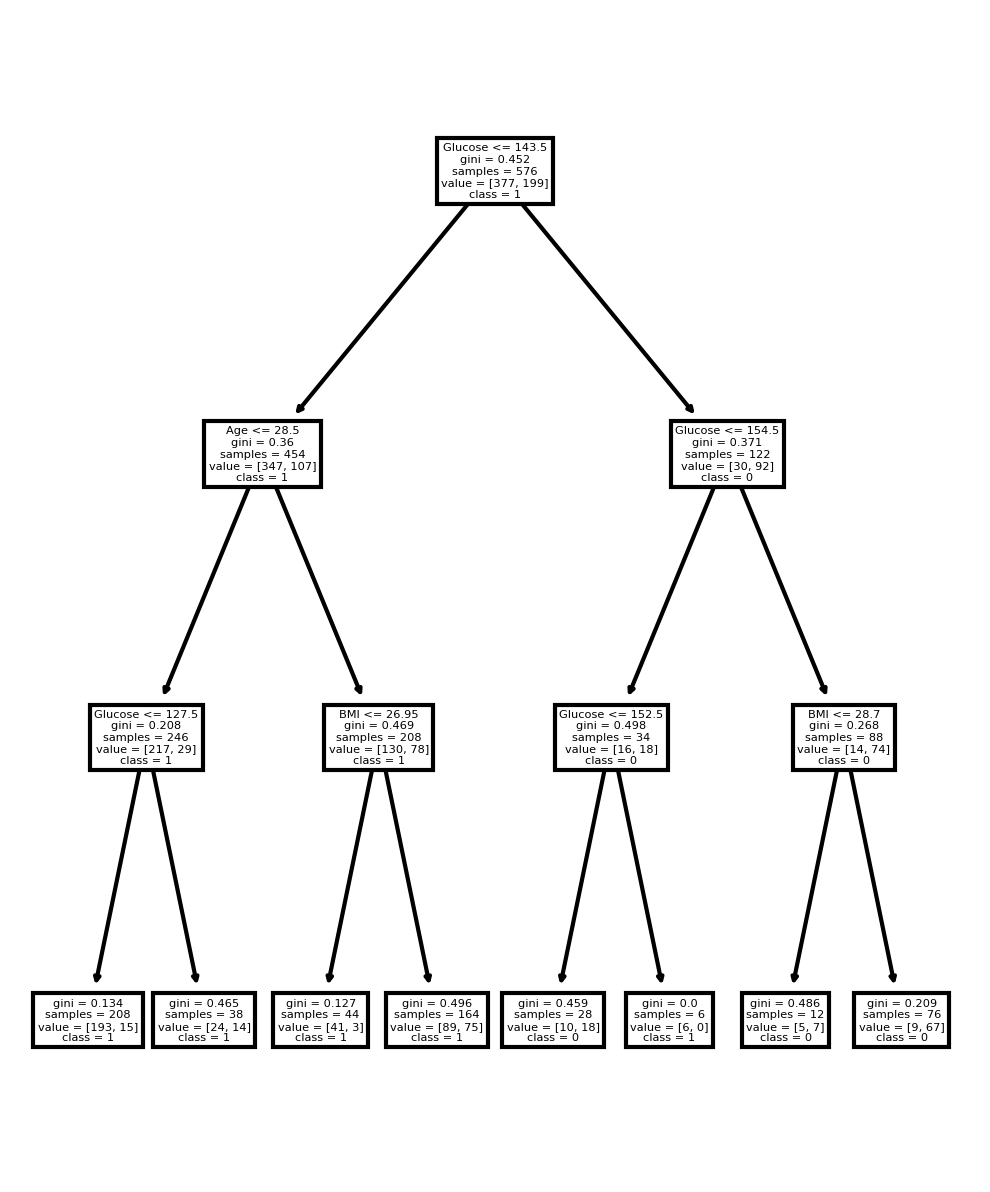

In [44]:
# Plot da Árvore

from sklearn import tree

fn = list(X_train.columns)
class_types = ['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=300)

tree.plot_tree(new_arvore_decisao, feature_names=fn, class_names=class_types)

### Emsembles

In [45]:
# Import dos emsembles Random Forest e Bagging

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


In [47]:
# Instanciando Emsembles
clf = RandomForestClassifier(n_estimators=100, random_state=50)

bagging = BaggingClassifier(n_estimators=100, random_state=50)

In [48]:
#Treinando árvore
clf.fit(X_train, y_train) 

bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=50)

In [50]:
# Analisando Performance
print("Acurácia do Modelo com Random Forest na base de treino:",accuracy_score(y_train,clf.predict(X_train)))
print("Acurácia do Modelo com Random Forest na base de teste:",accuracy_score(y_test,clf.predict(X_test)))

print("Acurácia do Modelo com Bagging na base de treino:",accuracy_score(y_train,bagging.predict(X_train)))
print("Acurácia do Modelo com Bagging na base de teste:",accuracy_score(y_test,bagging.predict(X_test)))

Acurácia do Modelo com Random Forest na base de treino: 1.0
Acurácia do Modelo com Random Forest na base de teste: 0.734375
Acurácia do Modelo com Bagging na base de treino: 1.0
Acurácia do Modelo com Bagging na base de teste: 0.7552083333333334


In [52]:
# Instanciando Emsembles
new_clf = RandomForestClassifier(n_estimators=100, random_state=50, max_depth=4)

#Treinando árvore
new_clf.fit(X_train, y_train) 

print("Acurácia do Modelo com Random Forest:",accuracy_score(y_train,new_clf.predict(X_train)))
print("Acurácia do Modelo com Random Forest:",accuracy_score(y_test,new_clf.predict(X_test)))

Acurácia do Modelo com Random Forest: 0.8211805555555556
Acurácia do Modelo com Random Forest: 0.7552083333333334


### Seleção de Hiperparâmetros

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score #import de funções que calculam as métricas de erro

precisao_2 = []

profundidade = list(range(1,11))

for i in range(len(profundidade)):
    
    clf_best = RandomForestClassifier(n_estimators=100, max_depth=profundidade[i], random_state=42)
    clf_best.fit(X_train, y_train) 
    
    print(profundidade[i])
    
        # Analisando Performance
    print("Precisão do Modelo com max_depth =", profundidade[i], ":",precision_score(y_test,clf_best.predict(X_test)))
    precisao_2.append(precision_score(y_test,clf_best.predict(X_test)))

#df_result_best_2 = pd.DataFrame(data={"Profundidade": profundidade, "Precisão": precisao_2})

1
Precisão do Modelo com max_depth = 1 : 0.7692307692307693
2
Precisão do Modelo com max_depth = 2 : 0.7209302325581395
3
Precisão do Modelo com max_depth = 3 : 0.7037037037037037
4
Precisão do Modelo com max_depth = 4 : 0.6779661016949152
5
Precisão do Modelo com max_depth = 5 : 0.6774193548387096
6
Precisão do Modelo com max_depth = 6 : 0.6323529411764706
7
Precisão do Modelo com max_depth = 7 : 0.6470588235294118
8
Precisão do Modelo com max_depth = 8 : 0.6417910447761194
9
Precisão do Modelo com max_depth = 9 : 0.6376811594202898
10
Precisão do Modelo com max_depth = 10 : 0.6619718309859155


In [31]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score #import de funções que calculam as métricas de erro

precisao_2 = []

num_arvores = list(range(1,301))

for i in range (len(num_arvores)):
    
    clf_best = RandomForestClassifier(n_estimators=num_arvores[i], random_state=42, max_depth=1)
    clf_best.fit(X_train, y_train) 
    
        # Analisando Performance
    print("Precisão do Modelo com", num_arvores[i], "árvores: ",precision_score(y_test,clf_best.predict(X_test)))
    precisao_2.append(precision_score(y_test,clf_best.predict(X_test)))

df_result_best = pd.DataFrame(data={"Número de Árvores": num_arvores, "Precisão": precisao_2})

Precisão do Modelo com 1 árvores:  0.0
Precisão do Modelo com 2 árvores:  0.0
Precisão do Modelo com 3 árvores:  0.6
Precisão do Modelo com 4 árvores:  0.6


C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\skl

Precisão do Modelo com 5 árvores:  0.6
Precisão do Modelo com 6 árvores:  0.7
Precisão do Modelo com 7 árvores:  0.6666666666666666
Precisão do Modelo com 8 árvores:  0.7368421052631579
Precisão do Modelo com 9 árvores:  0.7
Precisão do Modelo com 10 árvores:  0.8571428571428571
Precisão do Modelo com 11 árvores:  0.7
Precisão do Modelo com 12 árvores:  0.7727272727272727
Precisão do Modelo com 13 árvores:  0.7096774193548387
Precisão do Modelo com 14 árvores:  0.7916666666666666
Precisão do Modelo com 15 árvores:  0.7096774193548387
Precisão do Modelo com 16 árvores:  0.7
Precisão do Modelo com 17 árvores:  0.7
Precisão do Modelo com 18 árvores:  0.6896551724137931
Precisão do Modelo com 19 árvores:  0.75
Precisão do Modelo com 20 árvores:  0.75
Precisão do Modelo com 21 árvores:  0.75
Precisão do Modelo com 22 árvores:  0.7647058823529411
Precisão do Modelo com 23 árvores:  0.7647058823529411
Precisão do Modelo com 24 árvores:  0.7777777777777778
Precisão do Modelo com 25 árvores:  0

Precisão do Modelo com 171 árvores:  0.7142857142857143
Precisão do Modelo com 172 árvores:  0.7142857142857143
Precisão do Modelo com 173 árvores:  0.75
Precisão do Modelo com 174 árvores:  0.75
Precisão do Modelo com 175 árvores:  0.75
Precisão do Modelo com 176 árvores:  0.75
Precisão do Modelo com 177 árvores:  0.75
Precisão do Modelo com 178 árvores:  0.75
Precisão do Modelo com 179 árvores:  0.75
Precisão do Modelo com 180 árvores:  0.7142857142857143
Precisão do Modelo com 181 árvores:  0.75
Precisão do Modelo com 182 árvores:  0.75
Precisão do Modelo com 183 árvores:  0.75
Precisão do Modelo com 184 árvores:  0.75
Precisão do Modelo com 185 árvores:  0.75
Precisão do Modelo com 186 árvores:  0.7272727272727273
Precisão do Modelo com 187 árvores:  0.7272727272727273
Precisão do Modelo com 188 árvores:  0.7272727272727273
Precisão do Modelo com 189 árvores:  0.7142857142857143
Precisão do Modelo com 190 árvores:  0.75
Precisão do Modelo com 191 árvores:  0.75
Precisão do Modelo c

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score #import de funções que calculam as métricas de erro

precisao_2 = []

num_arvores = list(range(1,301))

for i in range (len(num_arvores)):
    
    clf_best = RandomForestClassifier(n_estimators=num_arvores[i], random_state=42, max_depth=4)
    clf_best.fit(X_train, y_train) 
    
        # Analisando Performance
    print("Precisão do Modelo com", num_arvores[i], "árvores: ",precision_score(y_test,clf_best.predict(X_test)))
    precisao_2.append(precision_score(y_test,clf_best.predict(X_test)))

df_result_best = pd.DataFrame(data={"Número de Árvores": num_arvores, "Precisão": precisao_2})

Precisão do Modelo com 1 árvores:  0.5737704918032787
Precisão do Modelo com 2 árvores:  0.6119402985074627
Precisão do Modelo com 3 árvores:  0.6440677966101694
Precisão do Modelo com 4 árvores:  0.6119402985074627
Precisão do Modelo com 5 árvores:  0.6428571428571429
Precisão do Modelo com 6 árvores:  0.6388888888888888
Precisão do Modelo com 7 árvores:  0.6363636363636364
Precisão do Modelo com 8 árvores:  0.6363636363636364
Precisão do Modelo com 9 árvores:  0.640625
Precisão do Modelo com 10 árvores:  0.65625
Precisão do Modelo com 11 árvores:  0.6666666666666666
Precisão do Modelo com 12 árvores:  0.6507936507936508
Precisão do Modelo com 13 árvores:  0.6610169491525424
Precisão do Modelo com 14 árvores:  0.6557377049180327
Precisão do Modelo com 15 árvores:  0.6610169491525424
Precisão do Modelo com 16 árvores:  0.6721311475409836
Precisão do Modelo com 17 árvores:  0.6833333333333333
Precisão do Modelo com 18 árvores:  0.6833333333333333
Precisão do Modelo com 19 árvores:  0.67

Precisão do Modelo com 150 árvores:  0.6724137931034483
Precisão do Modelo com 151 árvores:  0.6724137931034483
Precisão do Modelo com 152 árvores:  0.6724137931034483
Precisão do Modelo com 153 árvores:  0.6724137931034483
Precisão do Modelo com 154 árvores:  0.6724137931034483
Precisão do Modelo com 155 árvores:  0.6724137931034483
Precisão do Modelo com 156 árvores:  0.6724137931034483
Precisão do Modelo com 157 árvores:  0.6724137931034483
Precisão do Modelo com 158 árvores:  0.6724137931034483
Precisão do Modelo com 159 árvores:  0.6724137931034483
Precisão do Modelo com 160 árvores:  0.6724137931034483
Precisão do Modelo com 161 árvores:  0.6724137931034483
Precisão do Modelo com 162 árvores:  0.6724137931034483
Precisão do Modelo com 163 árvores:  0.6724137931034483
Precisão do Modelo com 164 árvores:  0.6724137931034483
Precisão do Modelo com 165 árvores:  0.6724137931034483
Precisão do Modelo com 166 árvores:  0.6724137931034483
Precisão do Modelo com 167 árvores:  0.672413793

Precisão do Modelo com 297 árvores:  0.6896551724137931
Precisão do Modelo com 298 árvores:  0.6896551724137931
Precisão do Modelo com 299 árvores:  0.6896551724137931
Precisão do Modelo com 300 árvores:  0.6896551724137931


### Seleção de Variáveis

### Exemplo - Feature Importance

Text(0.5, 1.0, 'Importância de cada features')

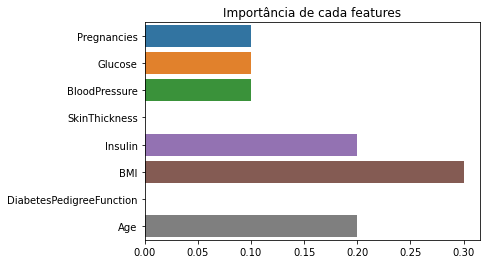

In [53]:
import seaborn as sns

features_feature_importance = list(X_train.columns)
features_feature_importance

X_train_feature_importance = X_train[features_feature_importance]
X_test_feature_importance = X_test[features_feature_importance]

model = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=42)
model.fit(X_train_feature_importance, y_train)
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=features_feature_importance)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada features')

In [54]:
print("Precisão do Modelo: ",precision_score(y_test,model.predict(X_test)))

Precisão do Modelo:  0.9166666666666666


Text(0.5, 1.0, 'Importância de cada features')

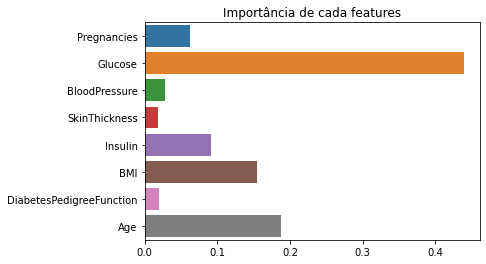

In [55]:
import seaborn as sns

features_feature_importance = list(X_train.columns)
features_feature_importance

X_train_feature_importance = X_train[features_feature_importance]
X_test_feature_importance = X_test[features_feature_importance]

model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
model.fit(X_train_feature_importance, y_train)
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=features_feature_importance)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada features')

### MLP Classifier

In [56]:
import numpy as np #Import de pacote para manipulação de matrizes
import pandas as pd #Import de pacote para manipulação de dataframes
from sklearn.neural_network import MLPClassifier #importe de pacote com funções de rede neural
from sklearn.model_selection import train_test_split #import de pacote para divisão da base em treino e teste (2000/400)
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score #import de funções que calculam as métricas de erro

In [59]:
# Instanciando e treinando rede neural genérica

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 4))
mlp_classifier.fit(X_train, y_train)
print("Precisão do Modelo: ",precision_score(y_test,mlp_classifier.predict(X_test)))

Precisão do Modelo:  1.0


In [60]:
# Alteração de hiperparâmetros do algoritmo

mlp_classifier = MLPClassifier(activation='logistic', max_iter=500, random_state=42, hidden_layer_sizes=(10,5))
mlp_classifier.fit(X_train, y_train)
print("Precisão do Modelo: ",precision_score(y_test,mlp_classifier.predict(X_test)))

Precisão do Modelo:  0.6111111111111112


C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:630: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
